# HardwareStation fun

In [2]:
from pydrake.all import Simulator, StartMeshcat 
from manipulation.station import MakeHardwareStation, load_scenario, LoadScenario
from manipulation.utils import RenderDiagram

import numpy as np
from pydrake.all import (
    AddMultibodyPlantSceneGraph,
    DiagramBuilder,
    InverseDynamicsController,
    MeshcatVisualizer,
    MultibodyPlant,
    Parser,
    Simulator,
    StartMeshcat,
)


In [3]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7000


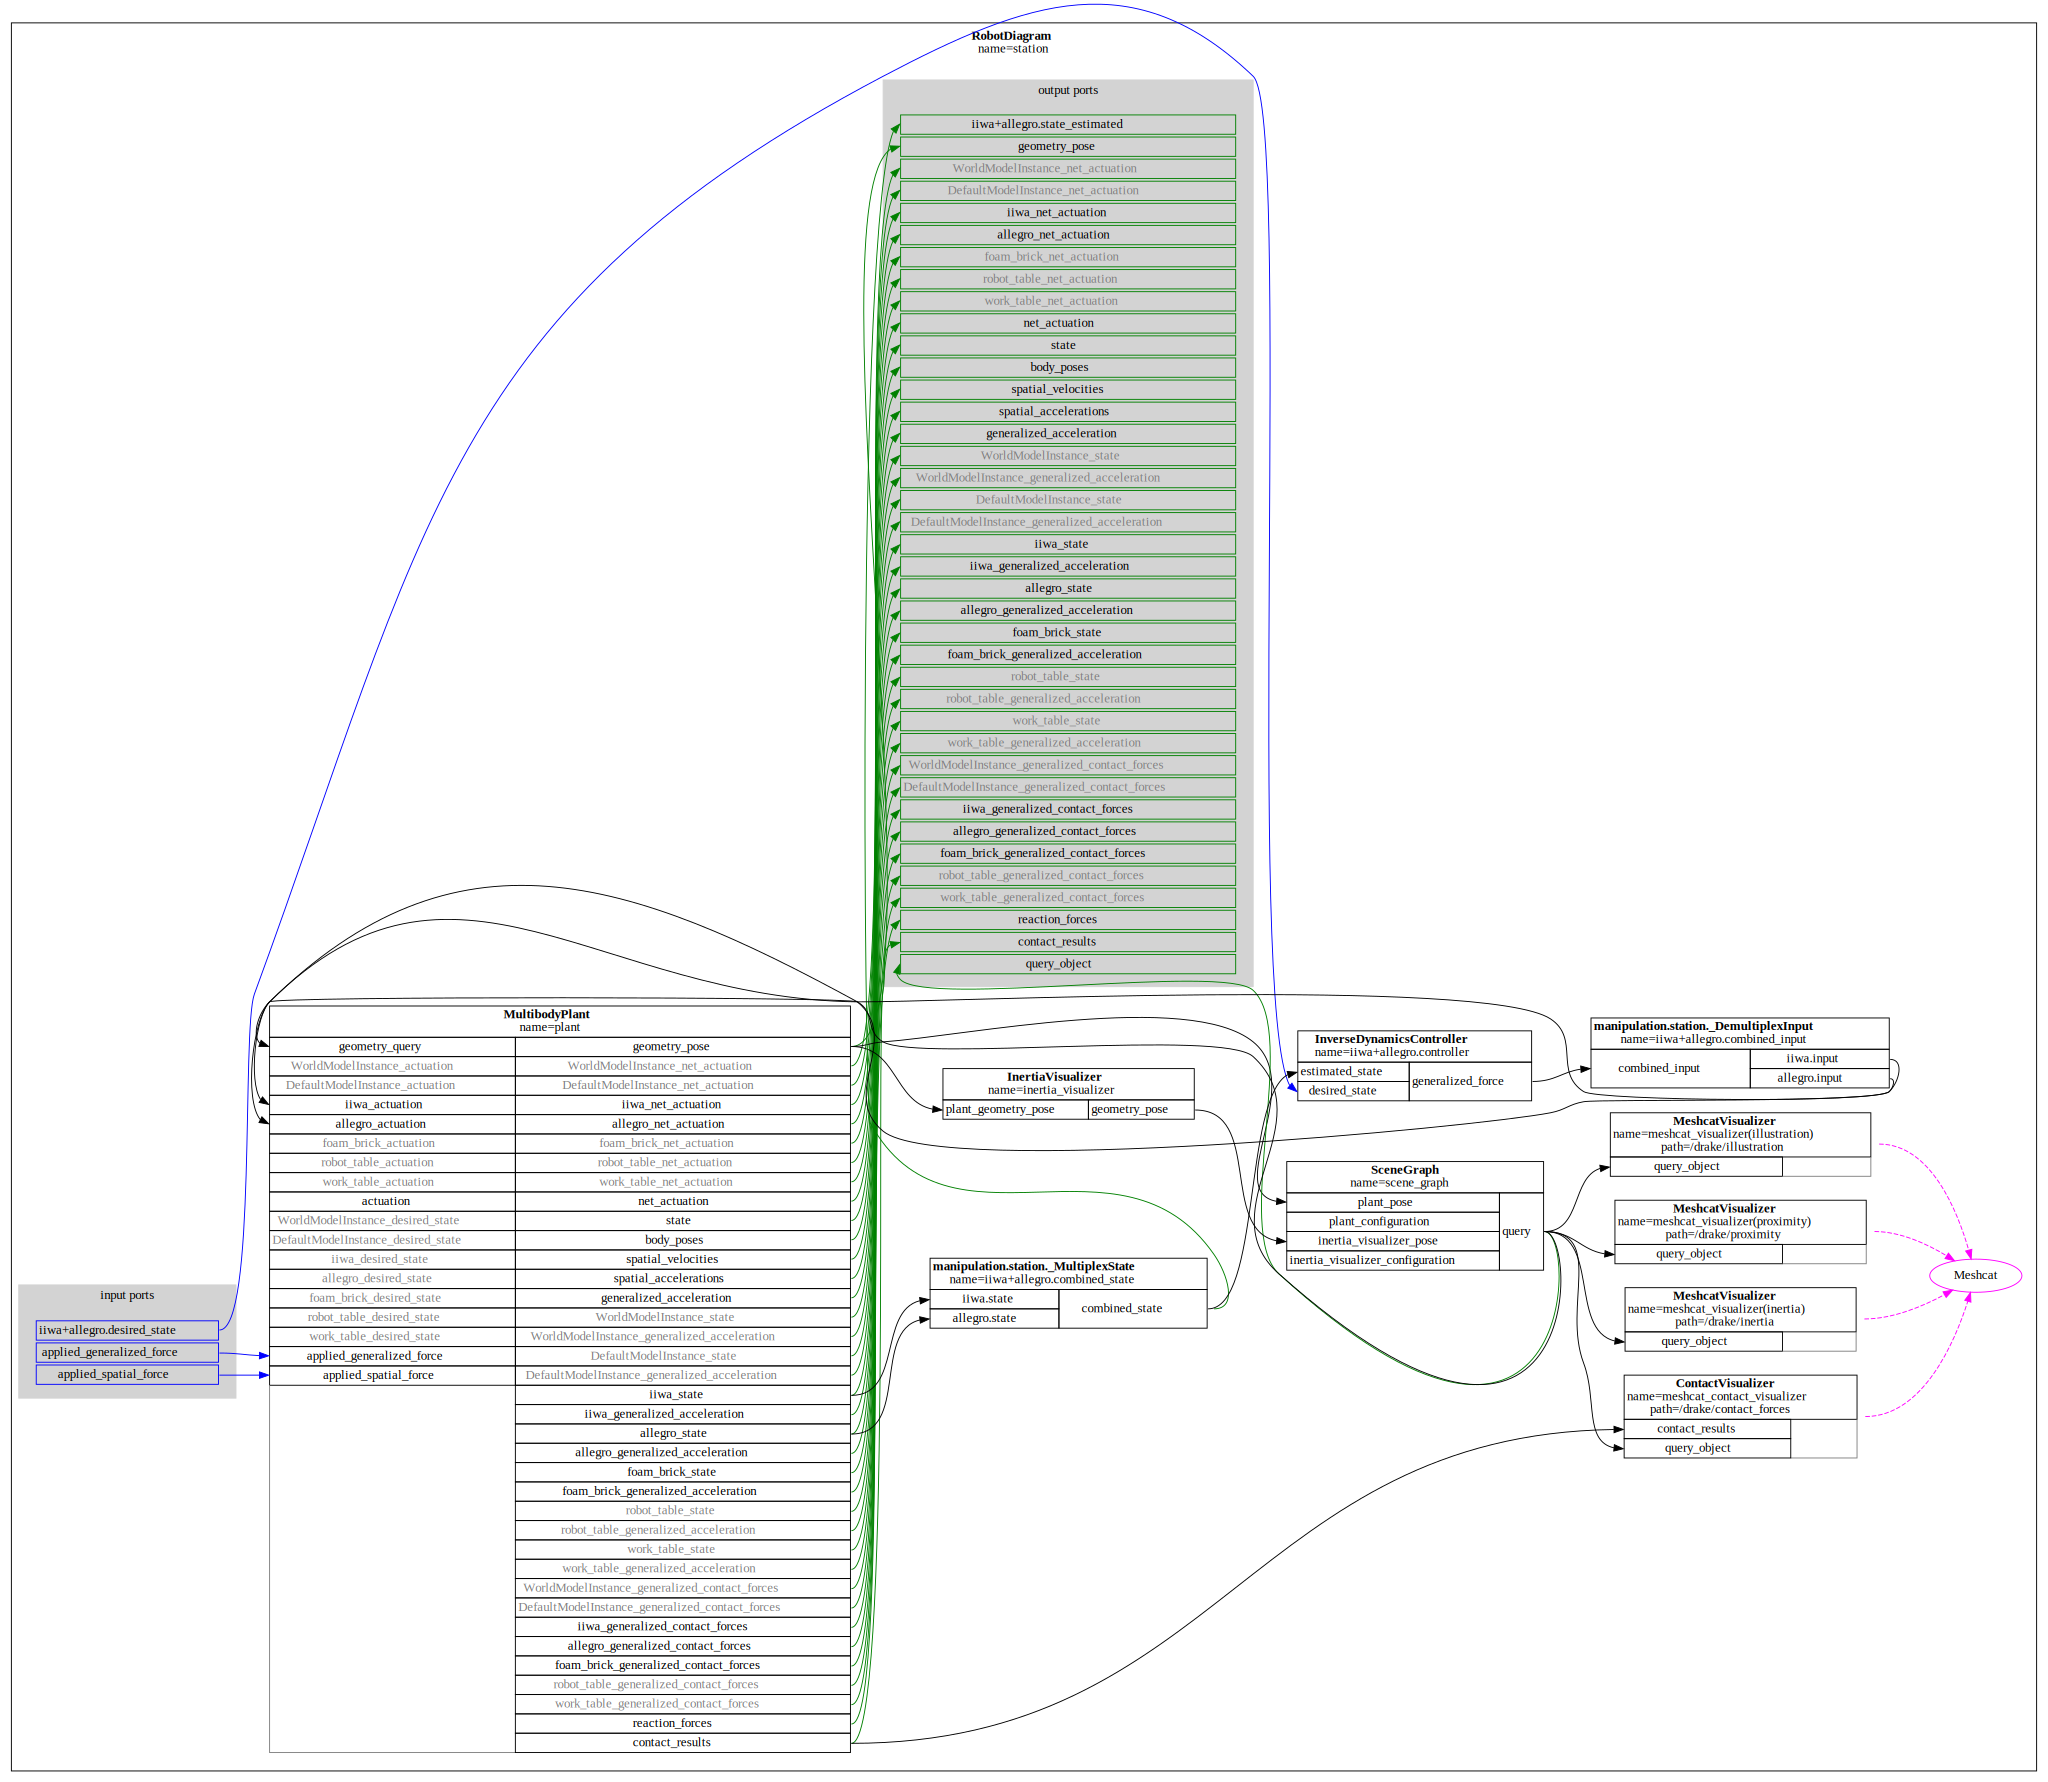

In [7]:
scenario_data = """
directives:
- add_model:
    name: iiwa
    file: package://drake/manipulation/models/iiwa_description/iiwa7/iiwa7_no_collision.sdf
    default_joint_positions:
        iiwa_joint_1: [0]
        iiwa_joint_2: [0.1]
        iiwa_joint_3: [0]
        iiwa_joint_4: [-1.2]
        iiwa_joint_5: [0]
        iiwa_joint_6: [ 1.6]
        iiwa_joint_7: [0]
- add_weld:
    parent: world
    child: iiwa::iiwa_link_0
- add_model:
    name: allegro
    file: package://drake/manipulation/models/allegro_hand_description/sdf/allegro_hand_description_right.sdf
- add_weld:
    parent: iiwa::iiwa_link_7
    child: allegro::hand_root
    X_PC:
        translation: [0, 0, 0.05]
        rotation: !Rpy { deg: [0, 0, 0]}
# And now the environment:
- add_model:
    name: foam_brick
    file: package://drake/examples/manipulation_station/models/061_foam_brick.sdf
    default_free_body_pose:
        base_link:
            translation: [0.6, 0, 0]
- add_model:
    name: robot_table
    file: package://drake/examples/kuka_iiwa_arm/models/table/extra_heavy_duty_table_surface_only_collision.sdf
- add_weld:
    parent: world
    child: robot_table::link
    X_PC:
        translation: [0, 0, -0.7645]
- add_model:
    name: work_table
    file: package://drake/examples/kuka_iiwa_arm/models/table/extra_heavy_duty_table_surface_only_collision.sdf
- add_weld:
    parent: world
    child: work_table::link
    X_PC:
        translation: [0.75, 0, -0.7645]
model_drivers:
    iiwa+allegro: !InverseDynamicsDriver {}
"""

scenario = LoadScenario(data=scenario_data)
station = MakeHardwareStation(scenario, meshcat)

RenderDiagram(station, max_depth=1)

simulator = Simulator(station)
context = simulator.get_mutable_context()

x0 = station.GetOutputPort("iiwa+allegro.state_estimated").Eval(context)
station.GetInputPort("iiwa+allegro.desired_state").FixValue(context, x0)

simulator.AdvanceTo(0.7)